<a href="https://colab.research.google.com/github/DynamiteJason27/The-Cost-of-Democracy/blob/main/Jason_DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


QUESTION 1:
Since the passing of the CHIPS Act in 2022, has domestic production of semiconductors increased?


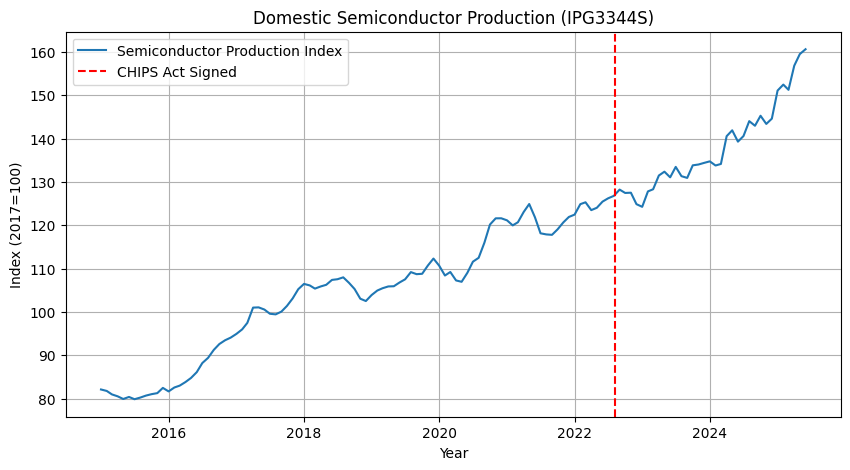

Rate of production change AFTER CHIPS Act (34 months): 26.67%
Rate of production change BEFORE CHIPS Act (34 months): 16.52%


QUESTION 2:
Has the average price (adjusted for inflation) of computers at major retail stores increased since 2015 (10 years ago)?


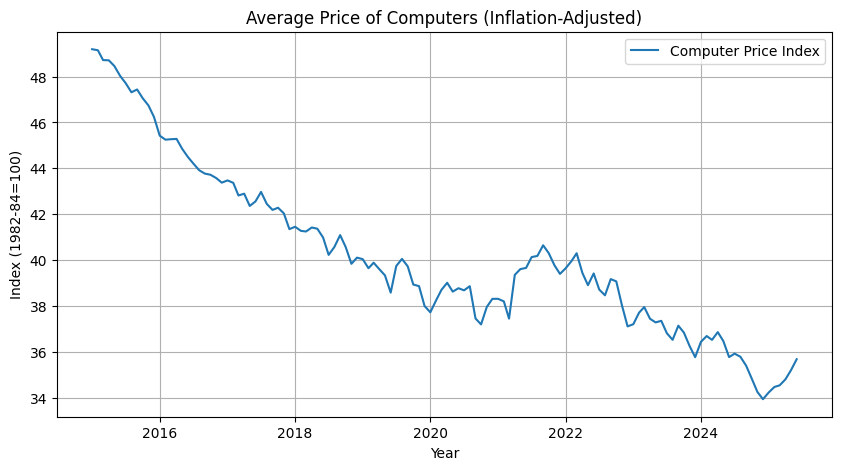

Change in computer prices since January 2015: -27.45%


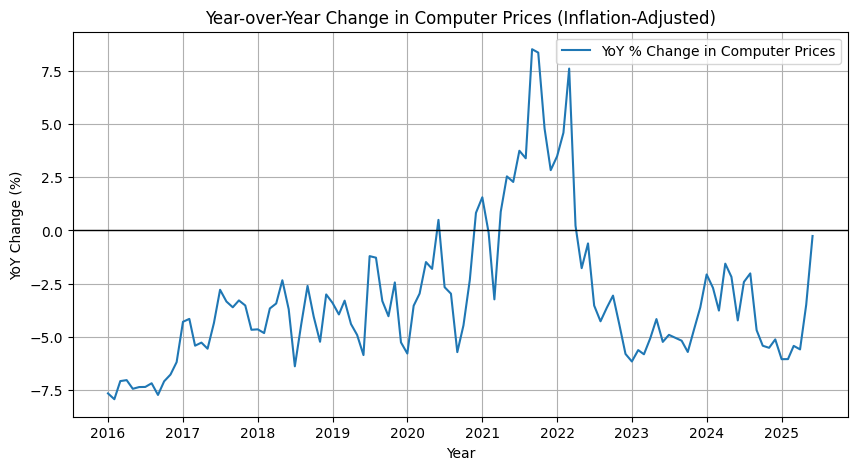



QUESTION 3:
How has consumer confidence shifted since the COVID pandemic? Are customers at major retail stores encouraged to buy new technology?


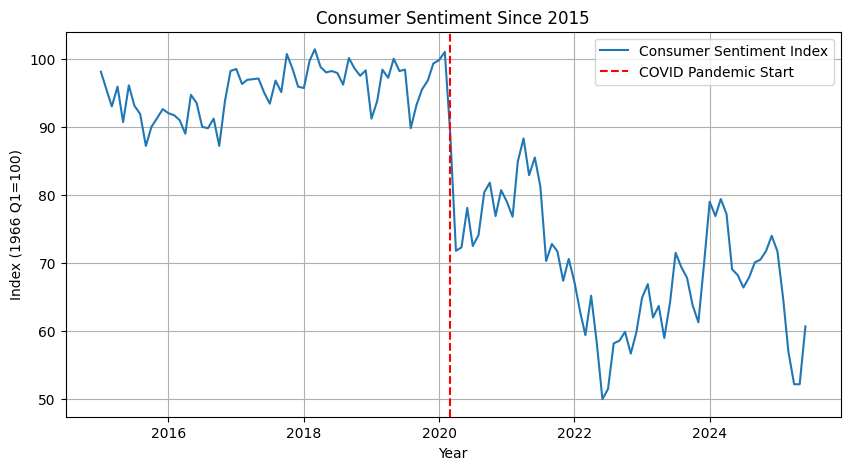

Change in consumer confidence since March 2020: -31.87%


In [9]:
# Python Group Project | Author: Jason Chiulli

# Dependencies & libraries
!pip install fredapi

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Connect to FREDAPI
API_KEY = "8b9fc09c11a2c4f847df2449859cc961"  # Replace with your actual FRED API key
fred = Fred(api_key=API_KEY)

# Nearest date from FRED
def get_nearest_value(df, target_date, column):
    nearest_date = df.index[df.index.get_indexer([pd.Timestamp(target_date)], method="nearest")[0]]
    return df.loc[nearest_date, column], nearest_date

# Question 1
# --------------------------------
print("\nQUESTION 1:")
print("Since the passing of the CHIPS Act in 2022, has domestic production of semiconductors increased?")

# Semiconductor production data
series_id_semiconductors = "IPG3344S"
semiconductors = fred.get_series(series_id_semiconductors)

# Conversion to a DataFrame & filter since 2015
df_semiconductors = pd.DataFrame(semiconductors, columns=["Index"])
df_semiconductors.index.name = "Date"
df_semiconductors = df_semiconductors[df_semiconductors.index >= "2015-01-01"]

# Plot semiconductor production index
plt.figure(figsize=(10,5))
plt.plot(df_semiconductors.index, df_semiconductors["Index"], label="Semiconductor Production Index")
plt.axvline(pd.Timestamp("2022-08-09"), color="red", linestyle="--", label="CHIPS Act Signed")
plt.title("Domestic Semiconductor Production")
plt.xlabel("Year")
plt.ylabel("Index (2017=100)")
plt.grid(True)
plt.legend()
plt.show()

# Calculation for rate of change SINCE CHIPS Act
pre_chips_value, pre_chips_date = get_nearest_value(df_semiconductors, "2022-08-09", "Index")
latest_value = df_semiconductors["Index"].iloc[-1]
months_after = (df_semiconductors.index[-1] - pre_chips_date).days // 30

after_change_pct = ((latest_value - pre_chips_value) / pre_chips_value) * 100

# Calculation for rate of change BEFORE CHIPS Act (same time period as after CHIPS Act)
start_before_date = pre_chips_date - pd.DateOffset(months=months_after)
before_start_value, _ = get_nearest_value(df_semiconductors, start_before_date, "Index")
before_change_pct = ((pre_chips_value - before_start_value) / before_start_value) * 100

print(f"Rate of production change AFTER CHIPS Act ({months_after} months): {after_change_pct:.2f}%")
print(f"Rate of production change BEFORE CHIPS Act ({months_after} months): {before_change_pct:.2f}%")

# Simple gap formatting
print("\n" + "="*50 + "\n")

# Question 2
# --------------------------------
print("QUESTION 2:")
print("Has the average price (adjusted for inflation) of computers at major retail stores increased since 2015 (10 years ago)?")

# Computer price index data
series_id_computers = "CUSR0000SEEE01"
computers = fred.get_series(series_id_computers)

# Convsersion to DataFrame & filter since 2015
df_computers = pd.DataFrame(computers, columns=["Price Index"])
df_computers.index.name = "Date"
df_computers = df_computers[df_computers.index >= "2015-01-01"]

# Year-over-Year % change
df_computers["YoY Change (%)"] = df_computers["Price Index"].pct_change(periods=12) * 100

# Plot Price Index
plt.figure(figsize=(10,5))
plt.plot(df_computers.index, df_computers["Price Index"], label="Computer Price Index")
plt.title("Average Price of Computers (Inflation-Adjusted)")
plt.xlabel("Year")
plt.ylabel("Index (1982-84=100)")
plt.grid(True)
plt.legend()
plt.show()

# Price change since January 2015
price_2015 = df_computers["Price Index"].iloc[0]
latest_price = df_computers["Price Index"].iloc[-1]
price_change_pct = ((latest_price - price_2015) / price_2015) * 100
print(f"Change in computer prices since January 2015: {price_change_pct:.2f}%")

# Year-over-Year change
plt.figure(figsize=(10,5))
plt.plot(df_computers.index, df_computers["YoY Change (%)"], label="YoY % Change in Computer Prices")
plt.axhline(0, color="black", linewidth=1)
plt.title("Year-over-Year Change in Computer Prices (Inflation-Adjusted)")
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.grid(True)
plt.legend()
plt.show()

# Simple gap formatting
print("\n" + "="*50 + "\n")

# Question 3
# --------------------------------
print("QUESTION 3:")
print("How has consumer confidence shifted since the COVID pandemic? Are customers at major retail stores encouraged to buy new technology?")

# Consumer sentiment index data
series_id_confidence = "UMCSENT"
confidence = fred.get_series(series_id_confidence)

# Conversion to DataFrame & filter since 2015
df_confidence = pd.DataFrame(confidence, columns=["Consumer Sentiment"])
df_confidence.index.name = "Date"
df_confidence = df_confidence[df_confidence.index >= "2015-01-01"]

# Consumer sentiment index plot
plt.figure(figsize=(10,5))
plt.plot(df_confidence.index, df_confidence["Consumer Sentiment"], label="Consumer Sentiment Index")
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", label="COVID Pandemic Start")
plt.title("Consumer Sentiment Since 2015")
plt.xlabel("Year")
plt.ylabel("Index (1966 Q1=100)")
plt.grid(True)
plt.legend()
plt.show()

# Calculate sentiment change since March 2020
confidence_2020, _ = get_nearest_value(df_confidence, "2020-03-01", "Consumer Sentiment")
latest_confidence = df_confidence["Consumer Sentiment"].iloc[-1]
confidence_change_pct = ((latest_confidence - confidence_2020) / confidence_2020) * 100
print(f"Change in consumer confidence since March 2020: {confidence_change_pct:.2f}%")
